# Week 1: Introduction to Computer Vision

## Notebook 5: Instance Segmentation with a Pre-Trained Mask R-CNN using Torchvision

Welcome to the fifth notebook of this week's Applied AI Study Group! We will study instance segmentation problem in this notebook. The aim of our task will be to identify each object in the given images and differentiate the instances even the ones that belong to the same category.

### 1. Instance Segmentation

Instance segmentation treats each objects of the same class as they are different objects, hence, label them differently such as object 1, object 2, etc. Its difference from [Semantic Segmentation](https://github.com/inzva/Applied-AI-Study-Group/blob/add-cv-week1/Applied%20AI%20Study%20Group%20%236%20-%20January%202022/Week%201/4-segmentation_uNet_PyTorch_final.ipynb) is its aim towards differentiating every single object in the given images. It is a more challenging problem since we want to identify each object separately comparing to having one entity corresponding multiple object.

### 2. Mask R-CNN

[Mask R-CNN](https://arxiv.org/pdf/1703.06870.pdf) is proposed for object instance segmentation. It extends the [Faster R-CNN](https://arxiv.org/pdf/1506.01497.pdf) by adding a branch for predicting an object mask parallel with the existing branch for bounding box regression. The proposed model regresses a segmentation mask for each Region of Interest (RoI). The branch consists of a Fully-Convolutional Network, predicting in a pixel-to-pixel manner.

<div>
    <img src="./images/mask_rcnn.png" width="500"/>
</div>

### 3. Torchvision

Torchvision package is built on PyTorch. It aims to provide popular datasets, model (including pretrained models) architectures, and image transformation techniques applied in the field of computer vision.

To install Torchvision:

    !pip install torchvision

### 4. Imports and Checks

You should have installed Numpy and Matplotlib using `pip` and, PyTorch using [Week 0 - Notebook 2](https://github.com/inzva/Applied-AI-Study-Group/blob/add-frameworks-week/Applied%20AI%20Study%20Group%20%236%20-%20January%202022/Week%200/2-mnist_classification_convnet_pytorch.ipynb).


The following two cells will import required libraries and packages to run this notebook and will download the model we will use. 

In [2]:
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as T

import numpy as np

print(torchvision.__version__)

0.11.2


Notice that we change our model into evaluation mode since we are not going to do a training.

In [ ]:
from torchvision.models.detection import maskrcnn_resnet50_fpn

model = maskrcnn_resnet50_fpn(pretrained=True, progress=False)
model = model.eval()

We define the classes our model is capable of understand in the next cell. Then, we assign an index to each class we have using `enumerate`, so that, we can have a correspondence between the labels and the predictions of our model.

In [3]:
inst_classes = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

inst_class_to_idx = {cls: idx for (idx, cls) in enumerate(inst_classes)}

We define a function to show images with results are drawn on them.

In [4]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

First, we read our example image. Then, using `convert_image_dtype`, we change our image type from `int` to `float`. Also, `convert_image_dtype` scales the values of image accordingly, which is [0, 1] for our case. This is a requirement for running our model.

In [5]:
from torchvision.transforms.functional import convert_image_dtype
from torchvision.io import read_image
from pathlib import Path

img = read_image(str(Path('images') / 'segmentation.jpeg'))

batch_int = torch.stack([torch.tensor(img)])
batch = convert_image_dtype(batch_int, dtype=torch.float)

<ipython-input-5-7d1b151ebdca>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_int = torch.stack([torch.tensor(img)])


We process the input image using conventional `forward` call in PyTorch models. You can see the printed results: we have a list of dictionary which contains detected objects' corresponding boxes, labels, scores, and object masks.

In [6]:
output = model(batch)
print(output)

/opt/miniconda3/envs/appliedai/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[{'boxes': tensor([[2236.8022, 1121.9703, 3324.7905, 2232.2251],
        [ 550.5339, 1039.6597,  906.3661, 1926.8721],
        [ 879.6401,  736.2079, 1771.5596, 2164.5557],
        [1256.4907,   49.0750, 2383.1384, 2199.3748],
        [1732.0477,  393.6781, 2183.6841,  808.5005],
        [ 685.7268, 1187.1721,  753.1898, 1519.8734],
        [ 704.8094, 1192.8486,  742.9521, 1350.3259],
        [1958.6548,  392.0903, 2145.8691,  769.9594],
        [2050.2739,  418.0536, 2158.0869,  763.8390],
        [1912.0931,  411.2296, 2205.1270,  899.5881],
        [ 806.6564, 1535.6541,  941.2572, 1716.0752],
        [2265.3792, 1639.4286, 3101.1978, 2182.0298],
        [ 900.8029,  487.6345, 2523.7183, 2169.8638],
        [1715.5803,  422.6087, 2316.1177, 1111.1576],
        [ 719.0599, 1194.0203,  749.0570, 1327.5358],
        [ 694.0530, 1188.9934,  733.8715, 1443.9241],
        [ 630.1434, 1196.2902,  737.8849, 1553.2375],
        [2175.4800, 1127.9725, 3343.9746, 2229.7505],
        [ 704.631

We investigate object masks further in the following cell. You can see that we have 22 instance detections.

In [7]:
img_output_dict = output[0]
img_object_masks = img_output_dict['masks']
print(f"shape = {img_object_masks.shape}, dtype = {img_object_masks.dtype}, "
      f"min = {img_object_masks.min()}, max = {img_object_masks.max()}")

shape = torch.Size([22, 1, 2400, 3600]), dtype = torch.float32, min = 0.0, max = 0.9998388290405273


We will apply a threshold filtering to masks we will have because we need to answer the following question for each pixel: How likely is this pixel to belong to the predicted class? Based on this question, we filter our pixels with `0.5` probability threshold (you can try different threshold values).

shape = torch.Size([22, 1, 2400, 3600]), dtype = torch.bool


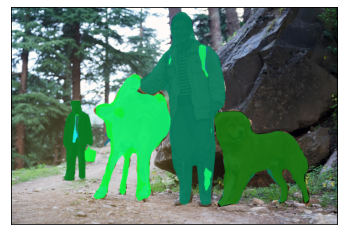

In [8]:
from torchvision.utils import draw_segmentation_masks
import torchvision.transforms.functional as F

proba_threshold = 0.5
img_bool_masks = img_output_dict['masks'] > proba_threshold
print(f"shape = {img_bool_masks.shape}, dtype = {img_bool_masks.dtype}")

# There's an extra dimension (1) to the masks. We need to remove it
img_bool_masks = img_bool_masks.squeeze(1)

show(draw_segmentation_masks(img, img_bool_masks, alpha=0.9))

We can also apply further threshold using detection scores to have more precise instance segmentation. You can observe the difference between the image above and below.

In [ ]:
score_threshold = 0.85

boolean_masks = [
    out['masks'][out['scores'] > score_threshold] > proba_threshold
    for out in output
]

img_with_masks = [
    draw_segmentation_masks(img, mask.squeeze(1))
    for img, mask in zip(batch_int, boolean_masks)
]
show(img_with_masks)